In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

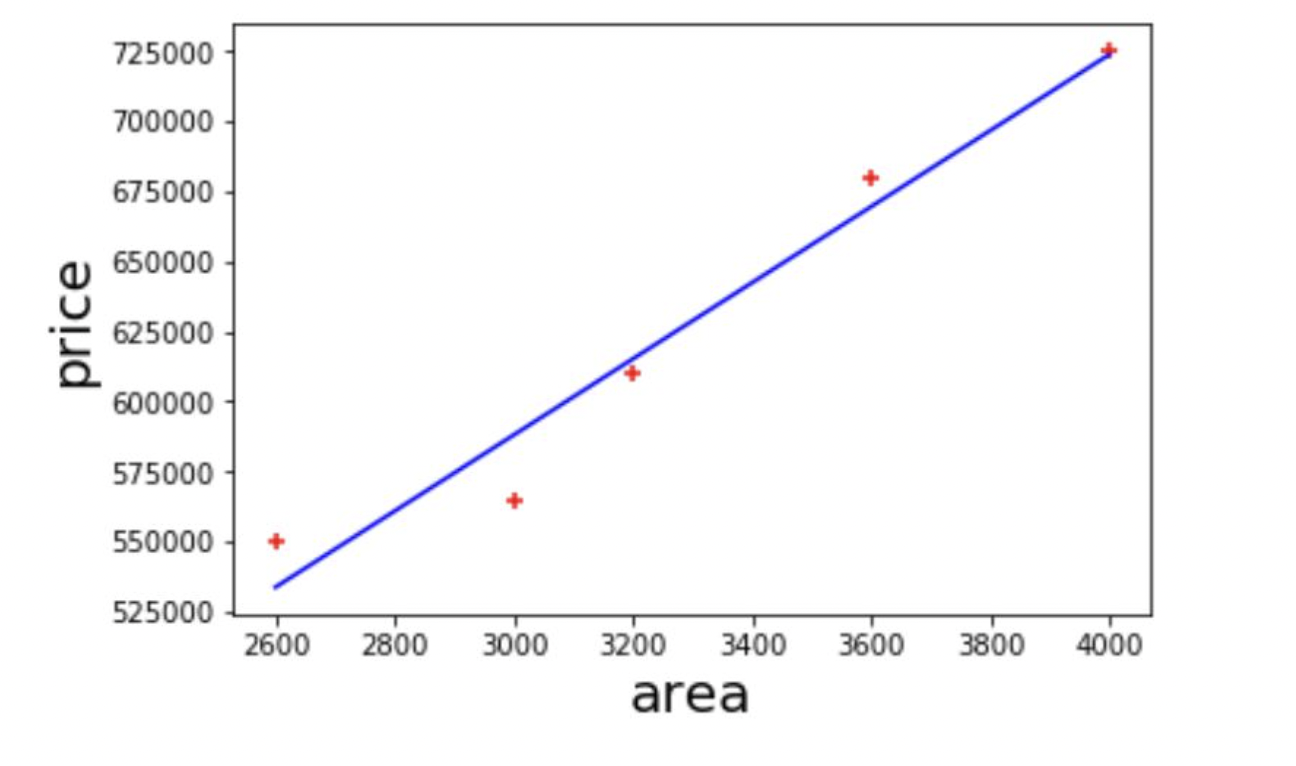

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/homeprices.csv')

In [3]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'Price $(\\$)$')

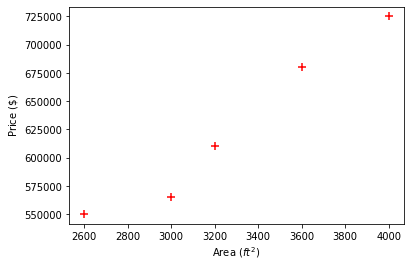

In [4]:
plt.scatter(df.area,df.price,marker='+',color = 'red',s=75)
plt.xlabel("Area $(ft^{2})$")
plt.ylabel("Price $(\$)$")

In [5]:
# the following operation is done when we have to give the value of area and predict its prize. (That's why we have defined it this way)
new_df = df.drop('price',axis='columns')
new_df
# The drop() method removes the specified row or column. By specifying the column axis ( axis='columns' ), 
#the drop() method removes the specified column. By specifying the row axis ( axis='index' ), the drop() method removes the specified row.

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [6]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

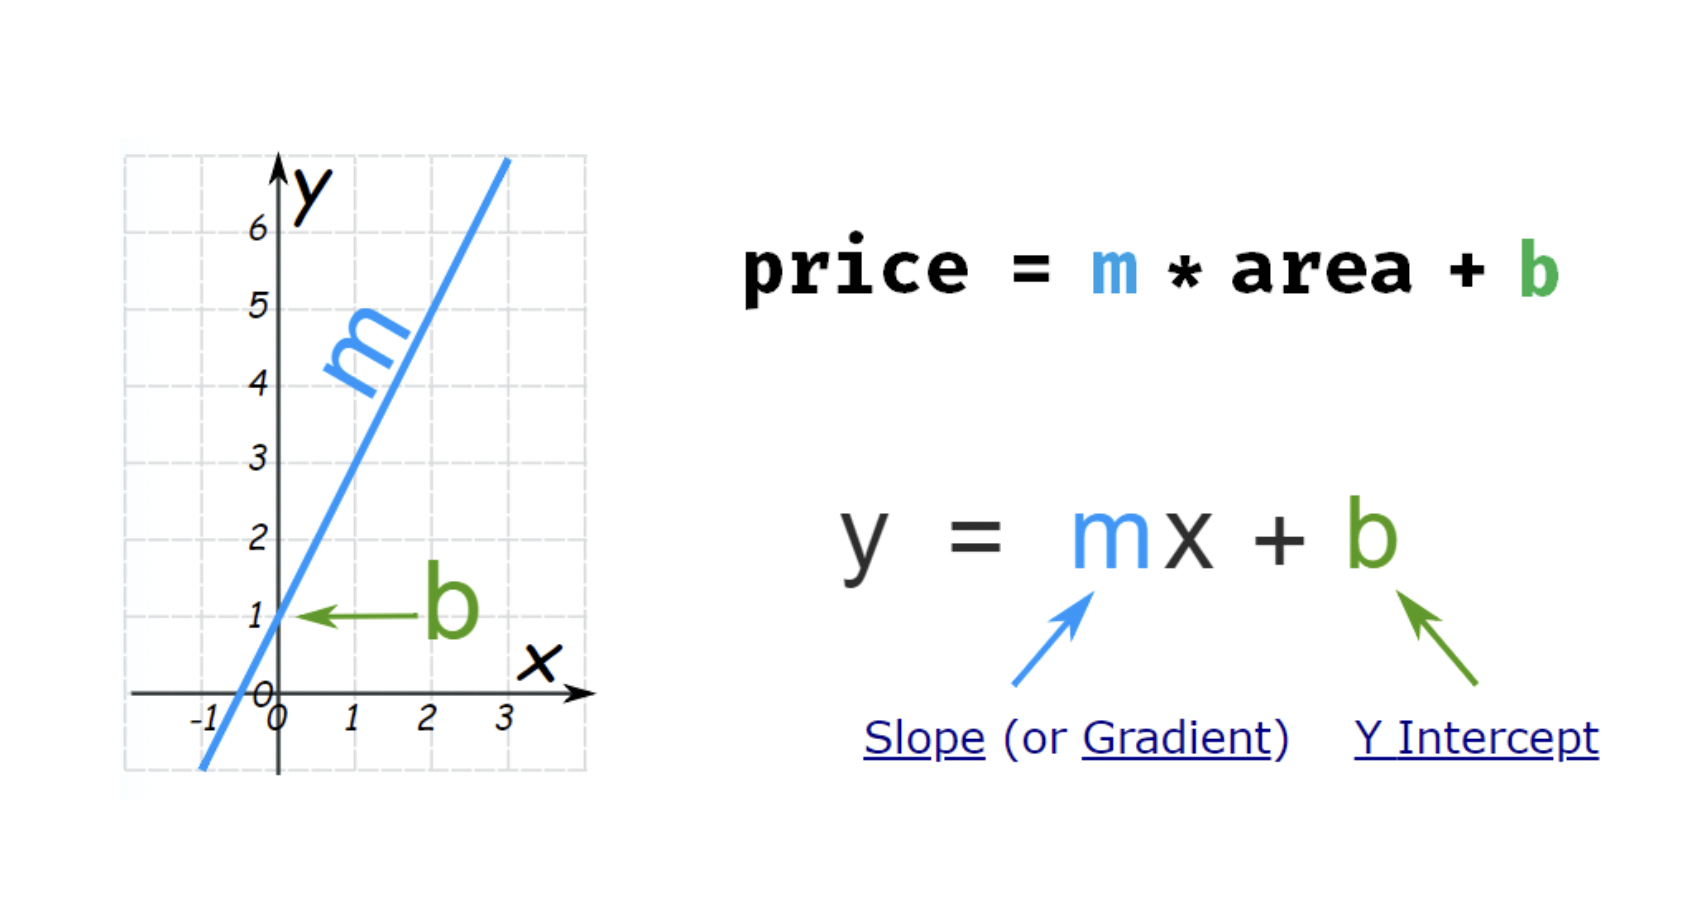

In [7]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [8]:
reg.predict([[3300]])   # Predicted value by appling linear regression.

array([628715.75342466])

In [9]:
reg.coef_     # slope 

array([135.78767123])

In [10]:
reg.intercept_    # the conatant term

180616.43835616432

In [11]:
# Y = m * X + b (m is coefficient and b is intercept)
3300*135.78767123 + 180616.43835616432

628715.7534151643

In [12]:
reg.predict([[7000]])  # Linear Regression prediction for a 7000 sq ft house price 

array([1131130.1369863])

#### Generate CSV file with list of home price predictions


In [13]:
# let's first import the csv file containing entries for area.
area_data = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/areas.csv')

In [14]:
area_data

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [15]:
price_p = reg.predict(area_data)

In [16]:
price_p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [17]:
area_data['Price'] = price_p

In [18]:
area_data

,area,Price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05
